##**SARSA: On-Policy Temporal Difference (TD) Learning.**

Import the necessary software libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from envs import Maze
from utils import plot_policy, plot_action_values, test_agent
np.object = object

In [2]:
env = Maze()

Create the Q(s,a) Table.

In [4]:
action_values = np.zeros(shape=(5,5,4))

Create the Policy pi(s).

In [10]:
def policy(state, epsilon=0.): #Epsilon Greedy Policy; lies between 0 and 1
  #Epsilon: Exploration-Exploitation Factor
  if np.random.random() < epsilon:
    return np.random.randint(4)
  else:
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

Plot the value Table, Q(s,a).

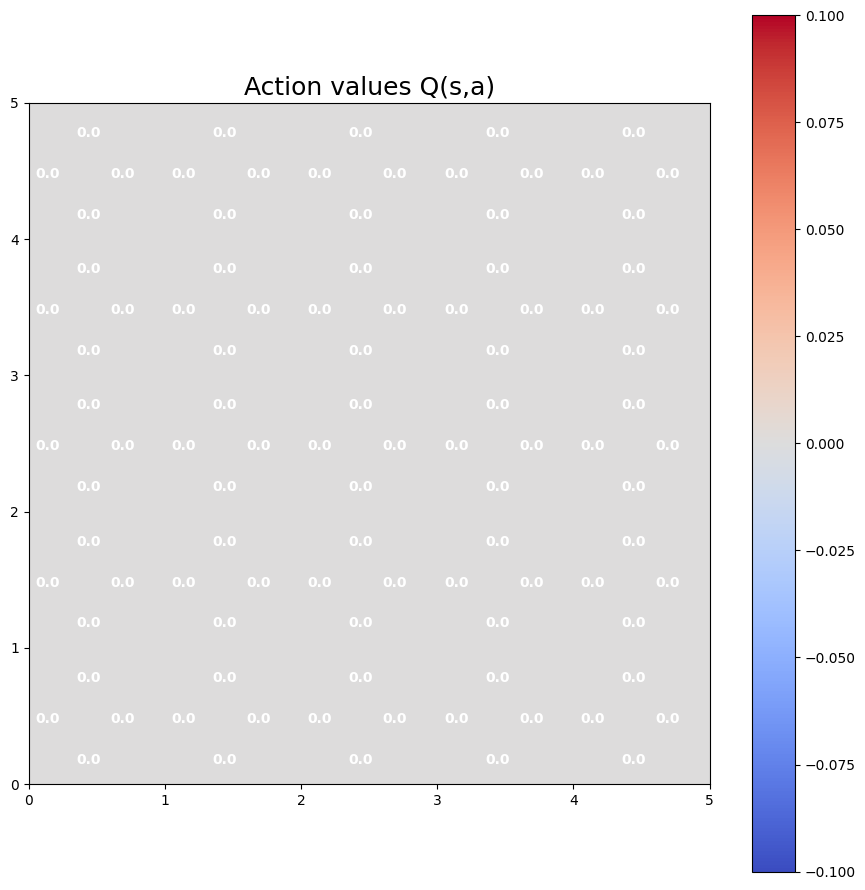

In [6]:
plot_action_values(action_values)

(Q-Values of each of the actions.)

Plot the Policy.

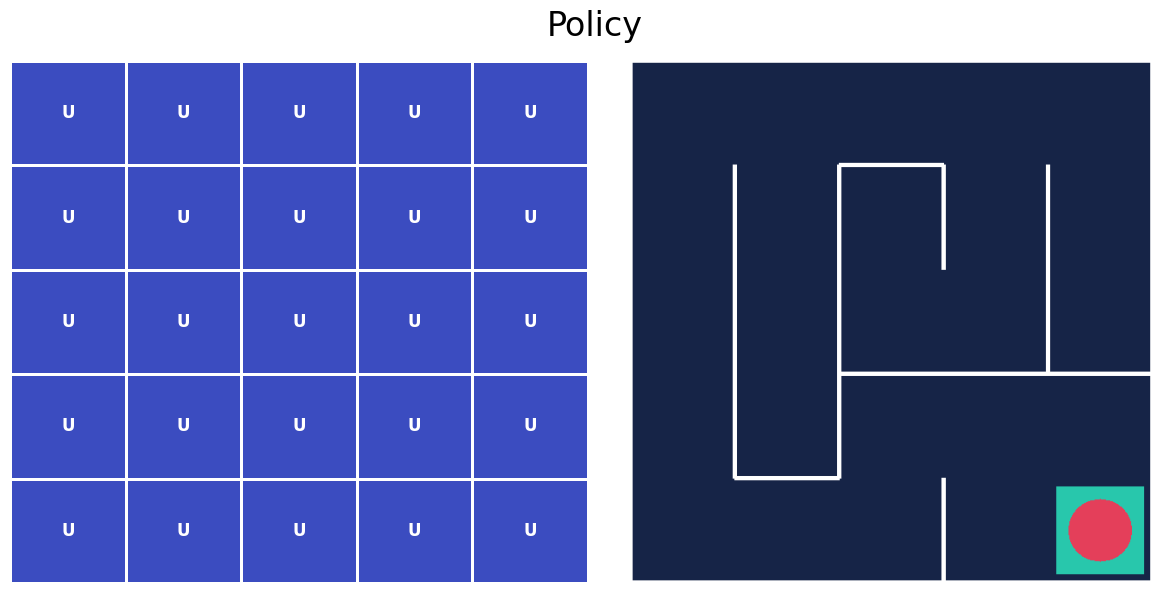

In [7]:
plot_policy(action_values,env.render(mode='rgb_array'))

Implement the Algorithm.

In [8]:
def sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2):

  for episode in range(1,episodes+1):

    state = env.reset()
    action = policy(state, epsilon)
    done = False

    while not done:
      next_state, reward, done, _ = env.step(action)
      next_action = policy(next_state, epsilon) #The next action to take is decided by the policy

      qsa = action_values[state][action]
      next_qsa = action_values[next_state][next_action]
      action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
      state = next_state
      action = next_action

In [11]:
sarsa(action_values, policy, 1000)

Show Resulting Value Table Q(s,a).

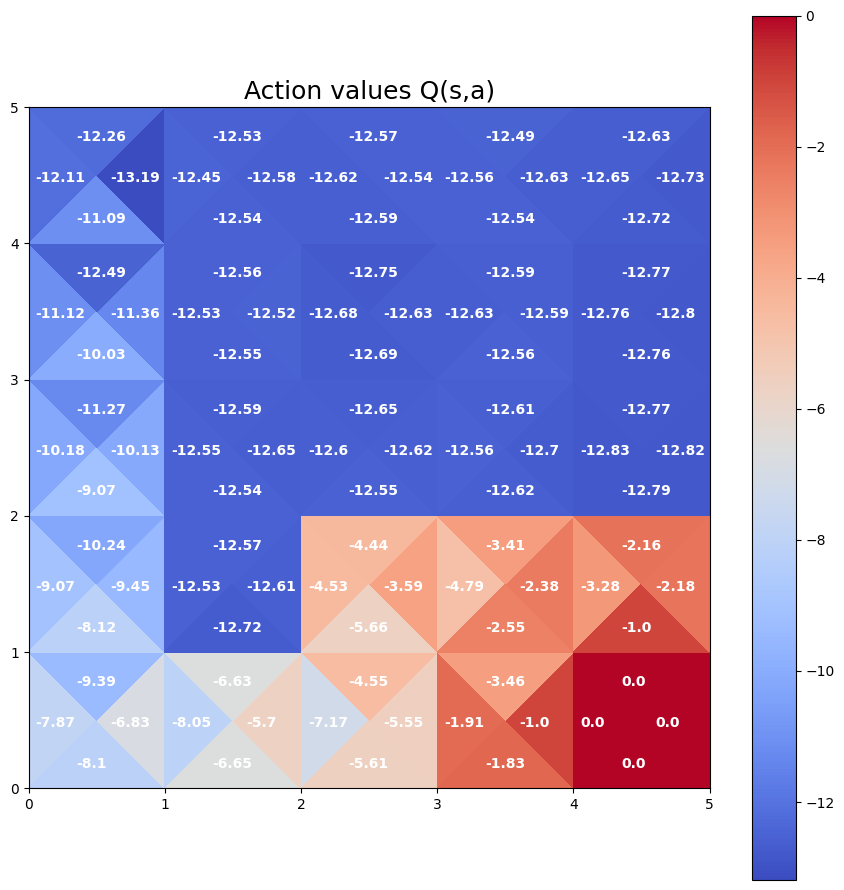

In [12]:
plot_action_values(action_values)

Show resulting policy, pi(.|s).

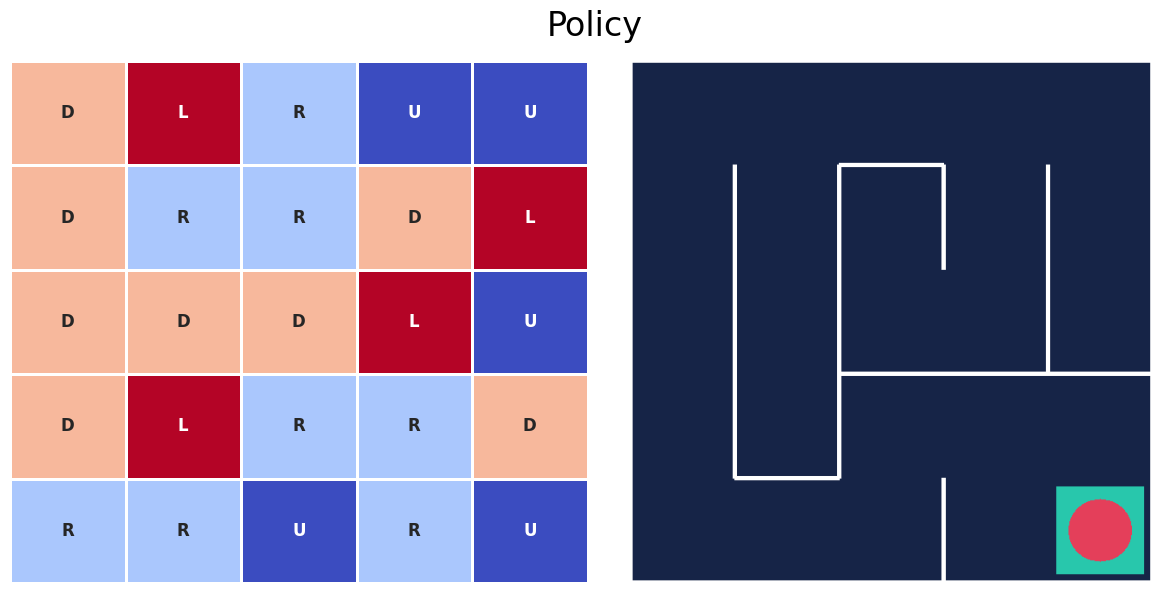

In [13]:
plot_policy(action_values, env.render(mode='rgb_array'))

Test the resulting agent.

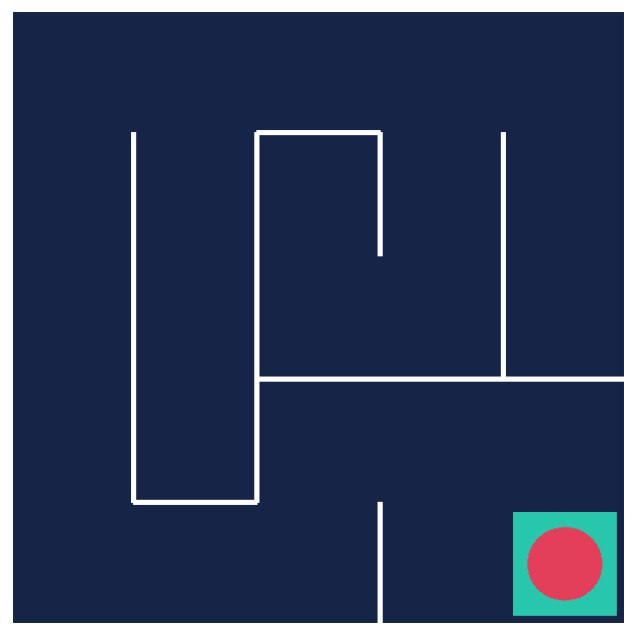

In [14]:
test_agent(env, policy, episodes=5)